In [2]:
from SDF_dataset import SdfDataset

root_path = '../shape_datasets'
dataset_test_files = [f'{root_path}/ellipse_sdf_dataset_smf22_arc_ratio_5000.csv',
                 f'{root_path}/triangle_sdf_dataset_smf20_arc_ratio_5000.csv', 
                 f'{root_path}/quadrangle_sdf_dataset_smf20_arc_ratio_5000.csv']

dataset = SdfDataset(dataset_test_files)


In [4]:
from SDF_dataset import ReconstructionDataset

root_path = '../shape_datasets'
dataset_test_files = [f'{root_path}/triangle_reconstruction_dataset_test.csv',
                 f'{root_path}/quadrangle_reconstruction_dataset_test.csv',
                 f'{root_path}/ellipse_reconstruction_dataset_test.csv']

dataset = ReconstructionDataset(dataset_test_files)


In [5]:
dataset.data.head()

,point_x,point_y,class,semi_axes_ratio,v1_x,v1_y,r_t1,r_t2,r_t3,v3_x,v3_y,v4_x,v4_y,r_q1,r_q2,r_q3,r_q4,arc_ratio
0,0,0,0.0,0.0,-0.766542,0.631390,0.004884,0.007689,0.024808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052095
1,0,0,0.0,0.0,-0.539680,0.315218,0.038473,0.004099,0.015253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141472
2,0,0,0.0,0.0,-0.656138,0.405145,0.005799,0.004975,0.013206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041045
3,0,0,0.0,0.0,-0.460911,0.288760,0.010225,0.006856,0.042311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114948
4,0,0,0.0,0.0,-0.439710,0.626527,0.013034,0.007397,0.003638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046194


X shape: torch.Size([1, 17])
SDF shape: torch.Size([1])
Tau shape: torch.Size([1])


<Figure size 1000x500 with 0 Axes>

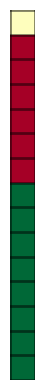

In [20]:
import torch
import numpy as np

batch_size = 1
# Get batch_size random samples from dataset
indices = torch.randint(0, len(dataset), (batch_size,)).tolist()
samples = [dataset[int(i)] for i in indices]

# print(samples)

# Unpack the samples
X = torch.stack([s[0] for s in samples])
# print(X.shape)
sdf = torch.stack([s[1] for s in samples])
tau = torch.stack([s[2] for s in samples])

print("X shape:", X.shape) 
print("SDF shape:", sdf.shape)
print("Tau shape:", tau.shape)

chi = X[:, 2:]
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10,5))

# Create a binary mask from chi tensor
mask = chi.bool().float() 

# Create a figure with subplots for each sample
fig, ax = plt.subplots(figsize=(10, 4))

# Plot tensor as image with mask
# print(mask.shape)
mask[:, 0] = 0.5
mask = mask.T
# print(mask.max())
# print(mask.min())
im = ax.imshow(mask.numpy(), cmap='RdYlGn', aspect='auto', alpha=1)
# ax.set_title('Chi Values Mask')
# ax.set_xlabel('Feature Index')
# ax.set_ylabel('Sample')

# Add colorbar
# plt.colorbar(im, ax=ax, label='Mask Value (0/1)')

# Add grid
# ax.set_xticks([])
# ax.set_yticks([])
ax.grid(True, which='both', color='black', linestyle='-', linewidth=2, alpha=0.5)
ax.set_xticks(np.arange(-0.5, chi.shape[0], 1), labels=[])
ax.set_yticks(np.arange(-0.5, chi.shape[1], 1), labels=[])
ax.tick_params(axis='both', which='both', length=0)
# Add black frame around plot
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(4)


# Make axes equal
ax.set_aspect('equal')
# Set axis limits based on data dimensions
# ax.set_xlim(0, chi.shape[0])  # Extend slightly beyond data edges
# ax.set_ylim(0, chi.shape[1])

# Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove ticks
# ax.tick_params(axis='both', which='both', length=0)
filename='../src/figures_paper/chi_mask_magma.png'
plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)

plt.tight_layout()
plt.show()



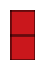

In [13]:
# Create a 2x3 tensor filled with ones
# tensor = torch.ones((1,1))*0.75
tensor = torch.ones((2,1))*0.75

# plt.cm.Reds 

# Create a figure with subplots for each sample
fig, ax = plt.subplots(figsize=(1, 0.8))

# Plot tensor as image with all cells colored red
# im = ax.imshow(tensor.numpy(), cmap="Greens", aspect='auto', vmin=0, vmax=1)
im = ax.imshow(tensor.numpy(), cmap="Reds", aspect='auto', vmin=0, vmax=1)

# Add grid
ax.grid(True, which='both', color='black', linestyle='-', linewidth=2, alpha=0.5)
ax.set_xticks(np.arange(-0.5, tensor.shape[1], 1), labels=[])
ax.set_yticks(np.arange(-0.5, tensor.shape[0], 1), labels=[])
ax.tick_params(axis='both', which='both', length=0)

# Make axes equal
ax.set_aspect('equal')

# Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# filename='../src/figures_paper/hvs.png'
filename='../src/figures_paper/coords.png'
plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.0)

plt.tight_layout()
plt.show()


In [4]:
# feature dim
print("feature dim: ", dataset.feature_dim)

# feature names
print("feature names: ", dataset.x_names)

feature dim:  17
feature names:  ['point_x', 'point_y', 'class', 'semi_axes_ratio', 'v1_x', 'v1_y', 'r_t1', 'r_t2', 'r_t3', 'v3_x', 'v3_y', 'v4_x', 'v4_y', 'r_q1', 'r_q2', 'r_q3', 'r_q4']


In [11]:
import pandas as pd
import torch
from torch.utils.data import Dataset
import numpy as np



In [17]:
dataset_files = ['../shape_datasets/triangle_sdf_dataset_smf40_radius_sample_100.csv']

dataset = RadiusDataset(dataset_files)
# print(dataset.geom_feature_ids)
# print(dataset.data.head())
X, _, arc_ratio = dataset[0]
print(X.shape)
print(arc_ratio.shape)

torch.Size([100, 17])
torch.Size([100])


Number of points:  494


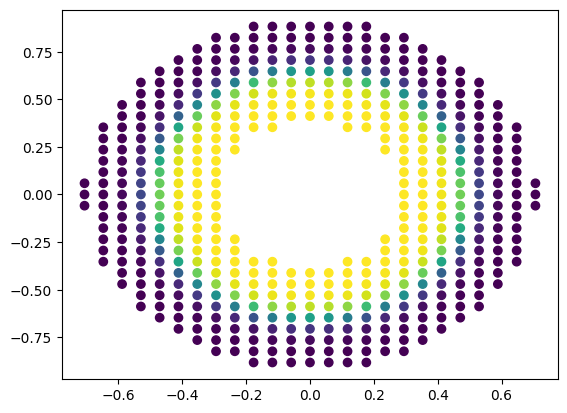

Number of points:  548


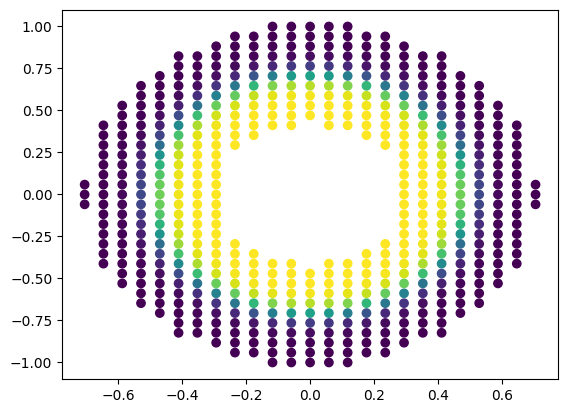

Number of points:  412


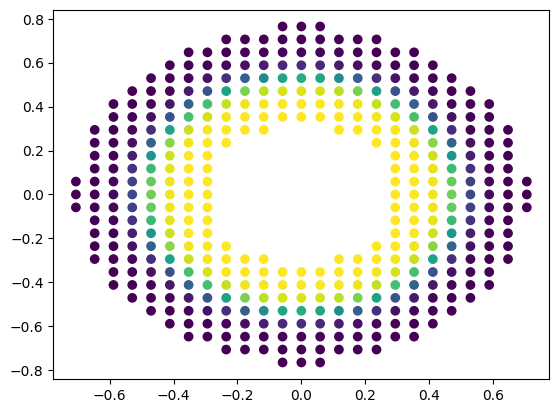

Number of points:  560


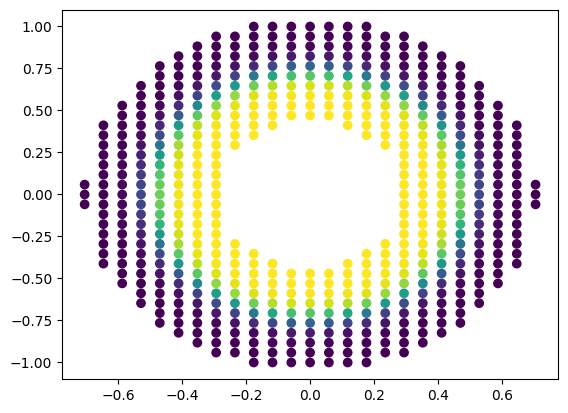

Number of points:  381


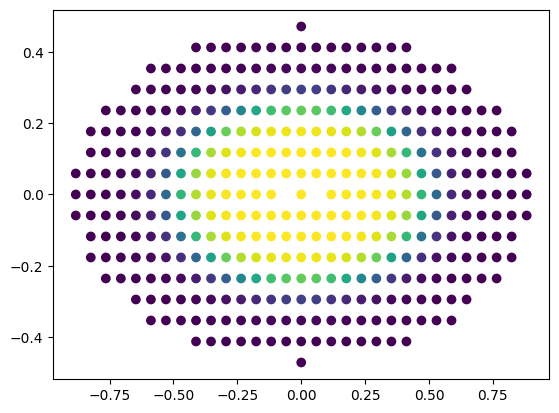

Number of points:  552


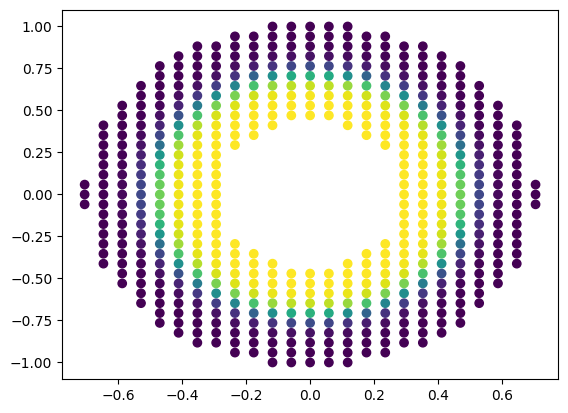

Number of points:  494


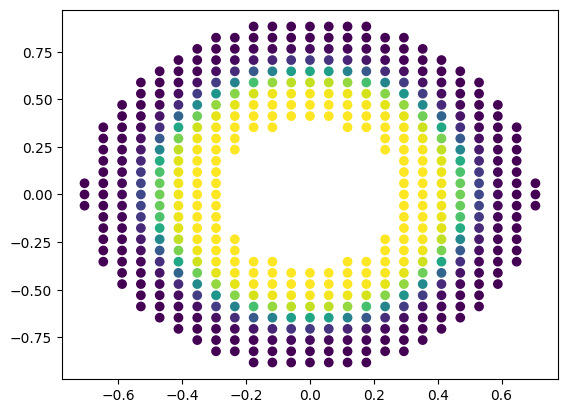

Number of points:  378


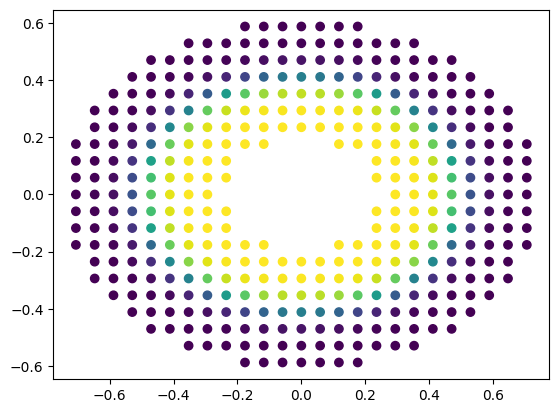

Number of points:  548


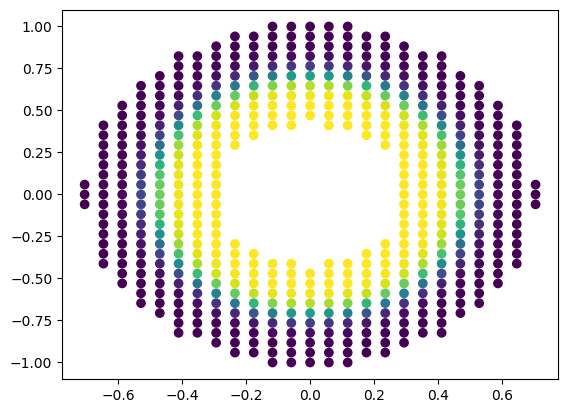

Number of points:  382


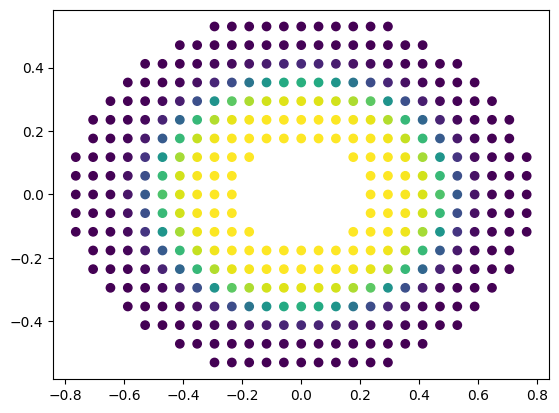

In [2]:
from SDF_dataset import SdfDatasetSurface
import matplotlib.pyplot as plt

dataset = SdfDatasetSurface(['../shape_datasets/ellipse_sdf_surface_dataset_test',
                             '../shape_datasets/triangle_sdf_surface_dataset_test',
                             '../shape_datasets/quadrangle_sdf_surface_dataset_test'],
                             value_limit=0.0001)

for i in range(10):
    sample = dataset[i]
    coords = sample['grid']
    sdf = sample['y']

    print("Number of points: ", sample['y'].shape[0])

    plt.scatter(coords[:, 0], coords[:, 1], c=sdf)
    plt.show()